In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy_traffic as nt
import statistics as st

In [110]:
plt.rcParams['figure.figsize']=13, 8

In [140]:
reccomendation = []
for _ in range(100):
    number_of_cars = 30
    positions = np.linspace(0,999,number_of_cars, endpoint=False)
    lengths = np.ones(number_of_cars) * 5
    speeds = np.ones(number_of_cars) * 10
    target_speed = np.ones(number_of_cars) * 33
    breaking_chances = np.ones(number_of_cars) * .1
    loop_length = 1000
    sim_length= 60
    position_history = np.zeros((sim_length+1,loop_length))
    speed_history = np.zeros((sim_length+1, number_of_cars))
    nt.update_history(speed_history, speeds, position_history, positions,lengths,loop_length, 0)

    for tick_num in range(sim_length):
        speeds, positions = nt.sim_tick(positions, lengths, speeds, target_speed, breaking_chances, loop_length)
        nt.update_history(speed_history, speeds, position_history, positions,lengths,loop_length, tick_num+1)
    later_speed_history = speed_history[30:]
    reccomendation.append((np.mean(later_speed_history) + np.std(later_speed_history))*3.6)
print(st.median(reccomendation))

84.0122489257


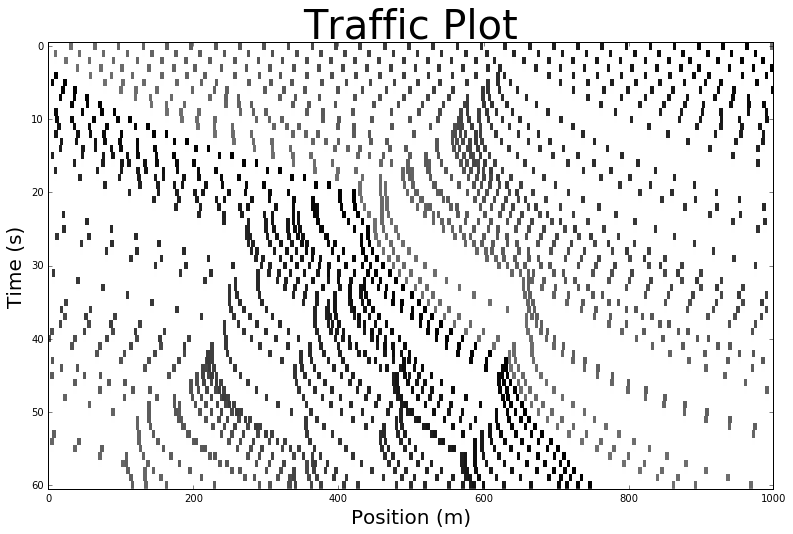

In [141]:
plt.imshow(position_history, cmap="Greys",aspect='auto', interpolation = 'none')
plt.xlabel("Position (m)",fontsize = 20)
plt.ylabel("Time (s)",fontsize = 20)
plt.title("Traffic Plot",fontsize = 40)
plt.show()

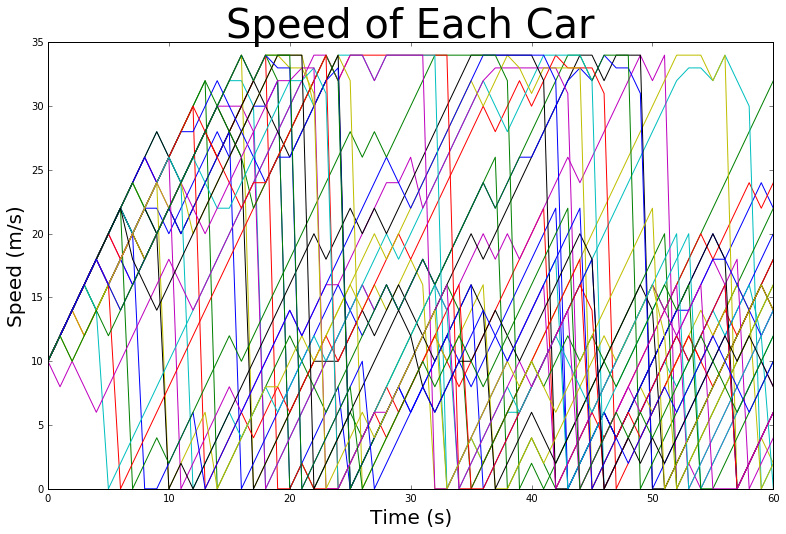

In [142]:
plt.plot(speed_history)
plt.ylabel("Speed (m/s)",fontsize = 20)
plt.xlabel("Time (s)",fontsize = 20)
plt.title("Speed of Each Car",fontsize = 40)
plt.show()

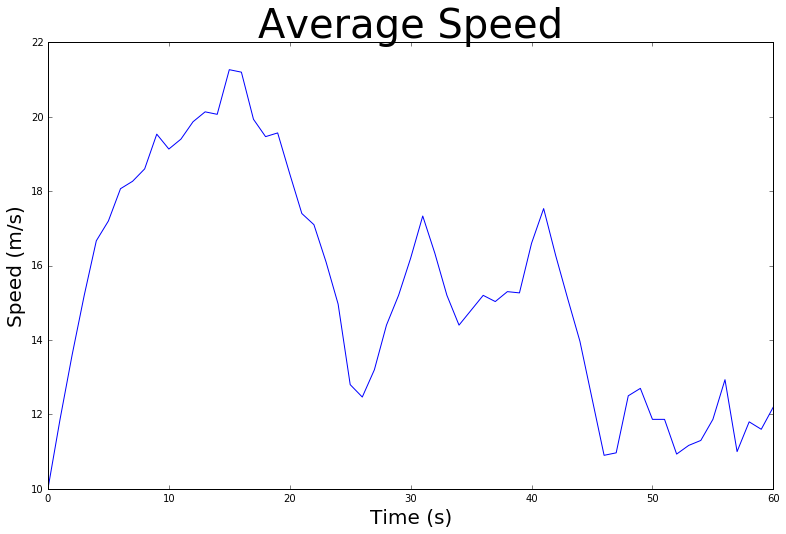

In [143]:
plt.plot(np.mean(speed_history,axis =1))
plt.ylabel("Speed (m/s)",fontsize = 20)
plt.xlabel("Time (s)",fontsize = 20)
plt.title("Average Speed",fontsize = 40)
plt.show()

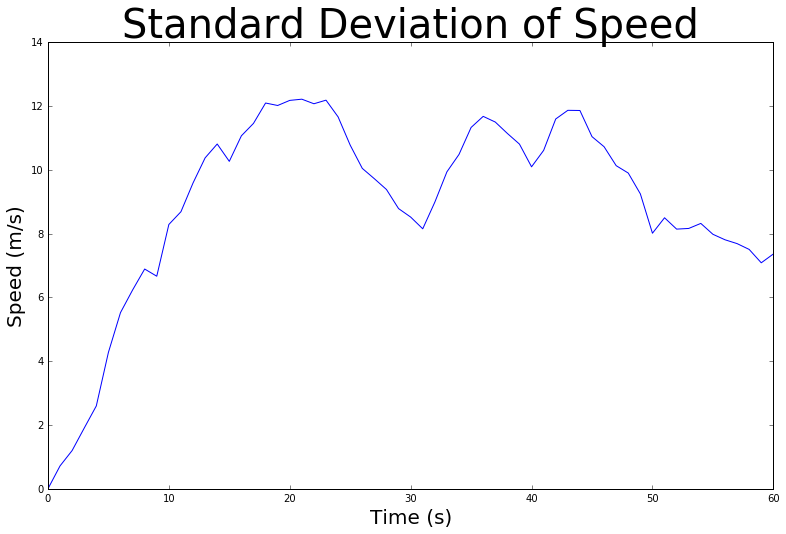

In [144]:
plt.plot(np.std(speed_history,axis =1))
plt.ylabel("Speed (m/s)",fontsize = 20)
plt.xlabel("Time (s)",fontsize = 20)
plt.title("Standard Deviation of Speed",fontsize = 40)
plt.show()

In [145]:
later_speed_history = speed_history[30:]

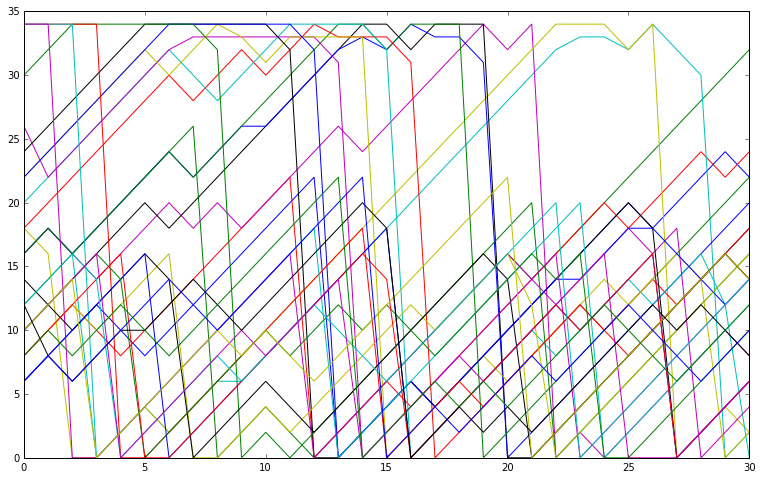

In [146]:
plt.plot(later_speed_history)
plt.show()

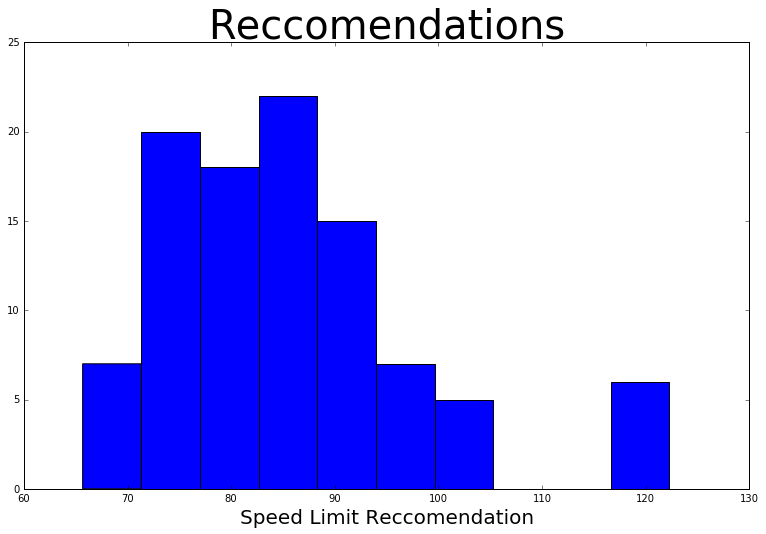

In [154]:
plt.hist(reccomendation)
plt.title("Reccomendations",fontsize = 40)
plt.xlabel("Speed Limit Reccomendation",fontsize = 20)
plt.show()

After several runs of the simulation we reccomend that the speed limit should be about 85 km/h.

In [178]:
postitions = np.array([1,1001,502,3003,4004,5005,6006])
break_chances = np.ones(len(postitions))*.1
break_modifier = np.ones(len(postitions))
my_list = [[0,1],[1000,1.4],[2000,1],[3000,2],[4000,1],[5000,1.2],[6000,1]]
for start, modifier in my_list:
    break_modifier[np.flatnonzero(postitions > start)] = modifier
print(np.multiply(break_chances,break_modifier))

[ 0.1   0.14  0.1   0.2   0.1   0.12  0.1 ]


In [175]:
break_modifier

array([ 1. ,  1.4,  1. ,  2. ,  1. ,  1.2,  1. ])